In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from rberga06.phylab import Datum as d

In [3]:
# Load data
files = [(pd.read_csv(f"data/F{i:04}CH1.CSV", header=None), pd.read_csv(f"data/F{i:04}CH2.CSV", header=None)) for i in range(16)]

In [4]:
def ts_where_y_around(ch2: pd.DataFrame, x: float) -> tuple[float, float]:
    last_before = ch2[ch2[4]<=x].tail(1)
    first_after = ch2[ch2[4]>=x].head(1)
    return last_before[3].iat[0], first_after[3].iat[0]

10%: 0.00010999999999999999 ± 2.000000000000001e-06 s
90%: 0.002432 ± 1.5999999999999955e-05 s
Tempo di salita: 2.322 ± 0.017999999999999957 ms


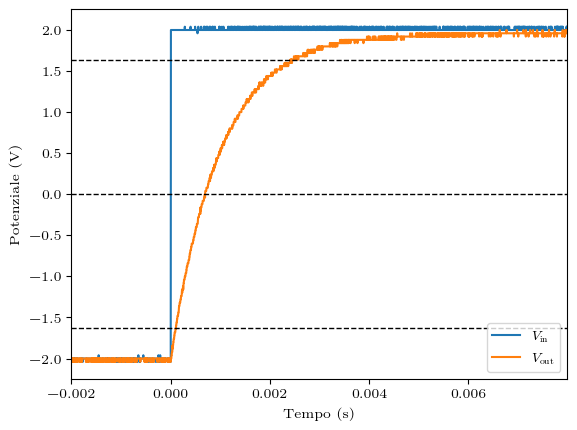

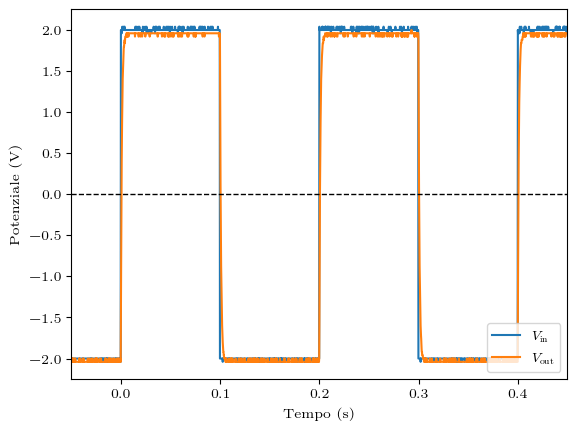

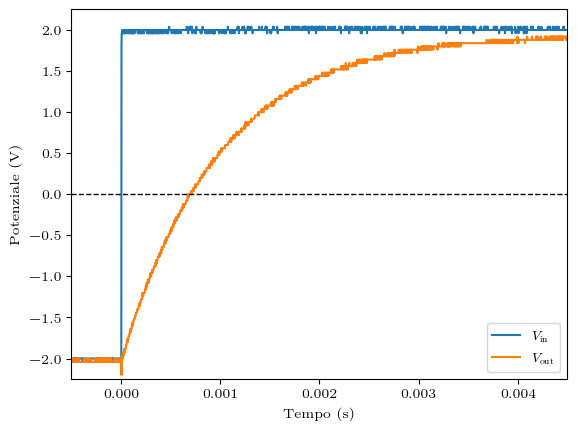

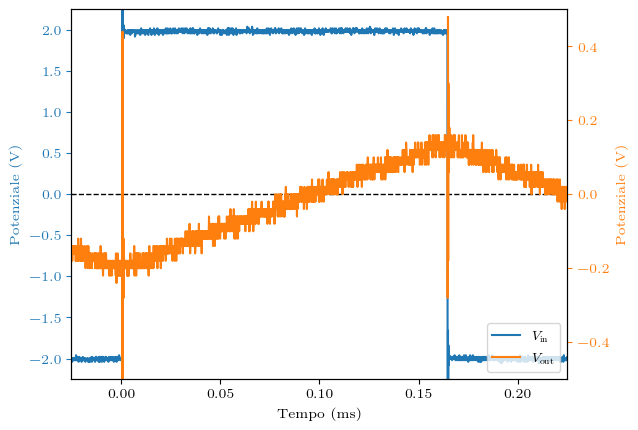

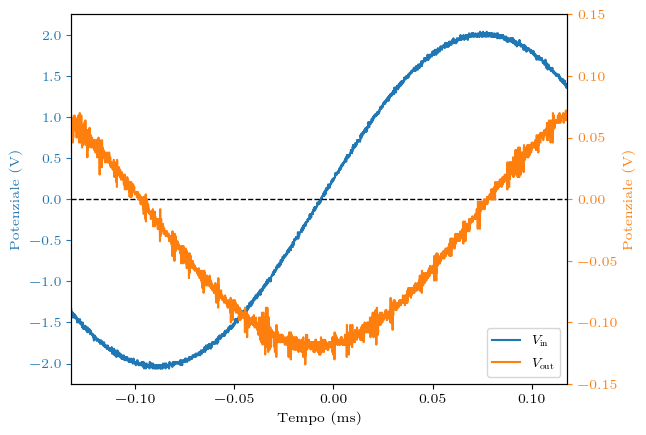

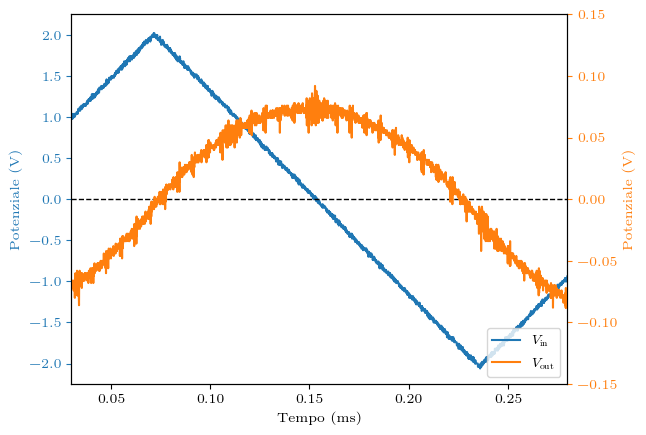

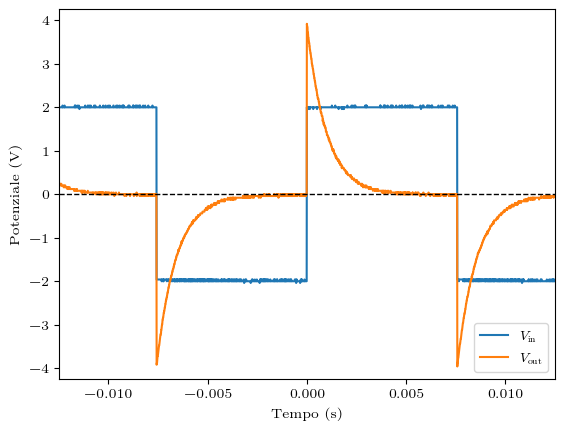

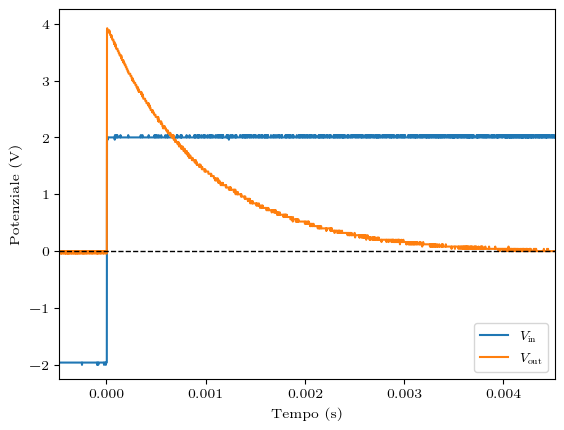

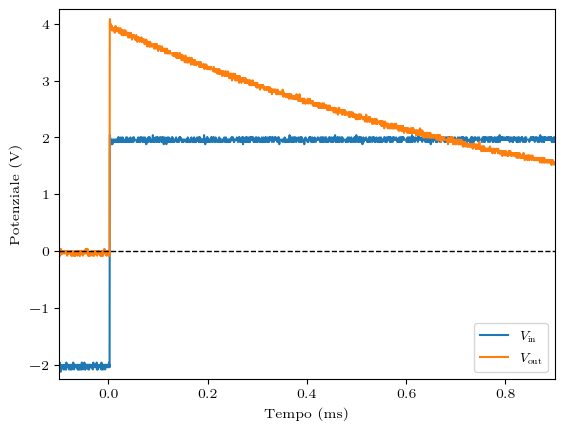

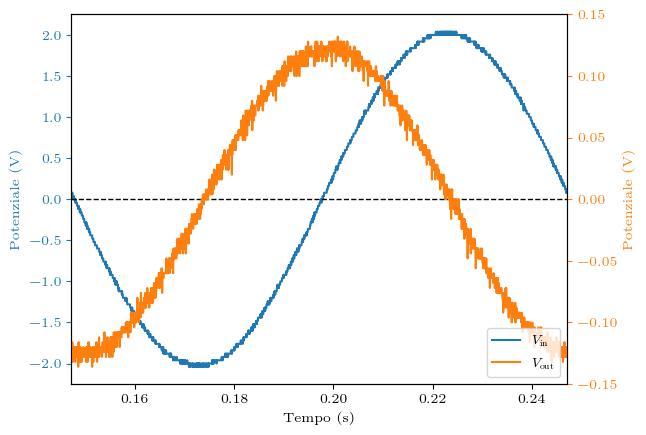

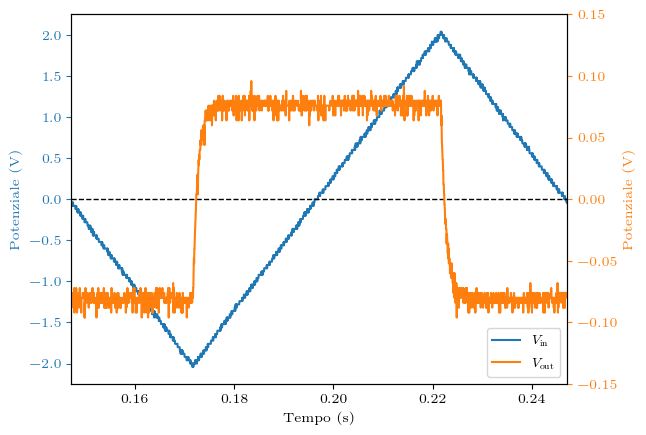

In [8]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Latin Modern Roman"
plt.rcParams["mathtext.fontset"] = "cm"
_AS_MILLISECONDS = {4, 6, 7, 11}
for i, (ch1, ch2) in enumerate(files):
    if i in {3, 5, 8, 12, 13}: continue
    _TIME_SCALE_FACTOR = 1000 if i in _AS_MILLISECONDS else 1
    # extract data & create axis
    ch1 = ch1[[3, 4]]
    ch2 = ch2[[3, 4]]
    fig, ax1 = plt.subplots()
    if i <= 3 or 9 <= i <= 11:
        ax2 = ax1
    else:
        ax2 = ax1.twinx()
    # plot data
    ch1plot, = ax1.plot(ch1[3] * _TIME_SCALE_FACTOR, ch1[4], color="C0", label=r"$V_\text{in}$")
    ch2plot, = ax2.plot(ch2[3] * _TIME_SCALE_FACTOR, ch2[4], color="C1", label=r"$V_\text{out}$")
    # plot 10% & 90%
    if i == 0:
        _min = ch1[4].min()
        _amplitude: float = ch1[4].max() - _min
        ax1.axhline(_the01 := _min + _amplitude * 0.1, color="0.0", linestyle="--", linewidth=1, rasterized=True)
        ax1.axhline(_the09 := _min + _amplitude * 0.9, color="0.0", linestyle="--", linewidth=1, rasterized=True)
        _t11, _t12 = ts_where_y_around(ch2, _the01)
        _t21, _t22 = ts_where_y_around(ch2, _the09)
        print("10%:", _t1 := d(_t12 + _t11, abs(_t12 - _t11))/2, "s")
        print("90%:", _t2 := d(_t22 + _t21, abs(_t22 - _t21))/2, "s")
        print("Tempo di salita:", (_t2 - _t1) * 1000, "ms")
    # customize labels
    ax1.set_xlabel(f"Tempo ({'m' if i in _AS_MILLISECONDS else ''}s)")
    if i <= 3 or 9 <= i <= 11:
        ax1.set_ylabel("Potenziale (V)")
        ax1.set_ylim(-4.25 if i == 9 else -2.25, 2.25 if i <= 3 else 4.25, auto=False)
    else:
        # set labels & colors accordingly
        ax1.set_ylabel("Potenziale (V)", color="C0")
        ax2.set_ylabel("Potenziale (V)", color="C1")
        ax1.tick_params(axis="y", colors="C0")
        ax2.tick_params(axis="y", colors="C1")
        # fix scale & ticks
        _Y_LIM_2 = 0.5 if i == 4 else 0.15
        ax1.set_ylim(-2.25, 2.25, auto=False)
        ax2.set_ylim(-_Y_LIM_2, _Y_LIM_2, auto=False)
    ax2.legend(loc="lower right", handles=[ch1plot, ch2plot])
    ax1.set_xlim(
        min(ch1[3].min(), ch2[3].min()) * _TIME_SCALE_FACTOR,
        max(ch1[3].max(), ch2[3].max()) * _TIME_SCALE_FACTOR
    )
    ax1.axhline(0, color="0.0", linestyle="--", linewidth=1, rasterized=True)
    # show the plot & save it to disk
    plt.show()
    fig.tight_layout()
    fig.savefig(f"img/{i}.png", dpi=300)